# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Кластеризация и понижение размерности

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 120 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

При необходимости установите библиотеку-расширение для `plotly`, позволяющую рисовать картинки на всплывающих окнах.

    pip install dash

In [1]:
import io
import os
import base64

import numpy as np
import pandas as pd
from tqdm.cli import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.express as px
from dash import Dash, dcc, html, Input, Output, no_update, callback

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
from transformers import ViTImageProcessor, ViTModel

sns.set_theme(style="darkgrid", palette="Set2")

<font size="4"><b>Внимание! Файл с решением может быть тяжелым. Если он весит 20 Мб и более, заранее разделите его на несколько частей.</b></font>

---
### Задача 1.

Докажите, что метод KMeans делит все пространство объектов на выпуклые многоугольники, возможно, неограниченные.

---
### Задача 2. 

Как мы знаем из <a href="https://miptstats.github.io/courses/ad_fivt/lecture8.pdf">лекции</a>, в пространствах большой размерности расстояния между случайными объектами становятся неинформативными. Эта проблема известна как *проклятие размерности*, и она влечет соответствующие ограничения на использование методов, основанных на использовании расстоянии между объектами.

В этой задаче предлагается промоделировать ситуацию понижения размерности. Сгенерируйте достаточно большое количество точек в единичном кубе в пространстве некоторой размерности. Пример кода дан ниже

In [2]:
sample_size = 1000
dimention = 100
sample = np.random.uniform(size=(sample_size, dimention))

Повторите генерацию для нескольких размерностей пространства от 2 до 1000. Используйте не менее 7 различных значений размерностей пространства.

In [19]:
sample_size = 1000
dimention1 = 100
sample1 = np.random.uniform(size=(sample_size, dimention1))

dimention2 = 50
sample2 = np.random.uniform(size=(sample_size, dimention2))
dimention3 = 30
sample3 = np.random.uniform(size=(sample_size, dimention3))

dimention4 = 200
sample4 = np.random.uniform(size=(sample_size, dimention4))

dimention5 = 10
sample5 = np.random.uniform(size=(sample_size, dimention5))

dimention6 = 500
sample6 = np.random.uniform(size=(sample_size, dimention6))

dimention7 = 2
sample7 = np.random.uniform(size=(sample_size, dimention7))

Для каждой размерности посчитайте норму каждой точки, тем самым получая набор значений расстояния от 0 до случайной точки. Нормируйте все расстояния, поделив на среднее полученных расстояний для каждой размерности пространства.

In [20]:
def calculate_norms(sample):
    norms = np.linalg.norm(sample, axis=1)
    return norms

def normalize_distances(distances):
    mean_distance = np.mean(distances)
    normalized_distances = distances / mean_distance
    return normalized_distances

dimensions = [100, 50, 30, 200, 10, 500, 2]
samples = [sample1, sample2, sample3, sample4, sample5, sample6, sample7]
arr_of_distances = []

for i in samples:
    norms = calculate_norms(i)
    norm_distance = normalize_distances(norms)
    arr_of_distances.append(norm_distance)
    print(norm_distance)

[0.95634841 0.92670442 0.99464638 1.00225892 0.93087952 1.00738484
 0.93811084 1.00143864 1.00619038 0.93625326 0.99517907 1.00603058
 0.98170225 0.96165854 1.00534231 0.99903905 1.0043999  0.98294424
 1.05444374 0.94674268 1.02469259 0.9226994  0.97957936 0.91877944
 0.95734483 0.96149504 0.96530273 1.08731712 0.98195053 0.91248423
 0.99607443 1.01840305 1.00830373 0.97293552 1.00291545 0.9847721
 0.99857448 0.96142784 1.05987072 1.00817226 1.02409246 0.98176033
 0.91085089 1.03945295 1.05946651 0.96135378 0.96498342 1.04540805
 0.90400565 1.03385359 0.92883147 0.93465361 1.02656907 0.97796497
 0.98376919 0.98757923 0.94863352 0.97927539 1.08178084 1.00315683
 0.92245355 0.90366559 0.9802853  0.98265226 1.00090538 0.97348744
 1.03961077 1.09273761 1.05076968 0.9660883  0.95820741 0.98812001
 1.06497492 1.09762827 0.97060148 1.00531979 1.05233771 1.04617588
 0.96179651 0.939149   1.07377052 1.03697816 1.12883757 1.00881475
 0.97195213 1.03388132 0.95706762 0.98374242 1.00869766 1.05692

Нарисуйте на одном графике <a href="https://miptstats.github.io/courses/python/09_seaborn.html#3.-Оценки-плотности" target="_blank">KDE-оценки плотности</a> нормированных расстояний для каждой размерности пространства.

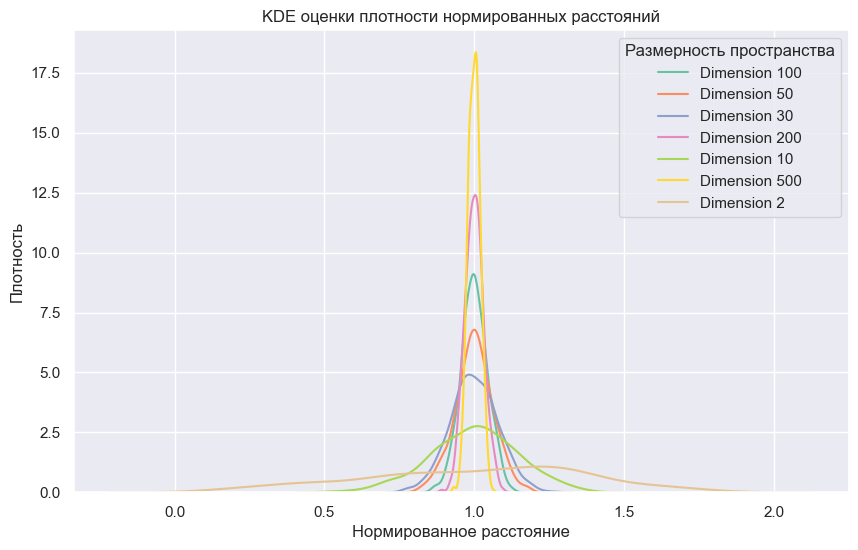

In [21]:
plt.figure(figsize=(10, 6))

for i, normalized_distances in enumerate(arr_of_distances):
    sns.kdeplot(normalized_distances, label=f'Dimension {dimensions[i]}')

plt.title('KDE оценки плотности нормированных расстояний')
plt.xlabel('Нормированное расстояние')
plt.ylabel('Плотность')
plt.legend(title='Размерность пространства')
plt.show()

Сделайте выводы
> KDE у более низких сплющенный. У больших - резкий, соответсвенно плотность больше у меньших размерностей.

---
### Задача 3.

В этой задаче мы попробуем кластеризовать различными способами изображения котиков из датасета с <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">семинара</a>.

Скачайте данные, загрузите их и отрисуйте несколько примеров.

Размерность cats: (15747, 12288)


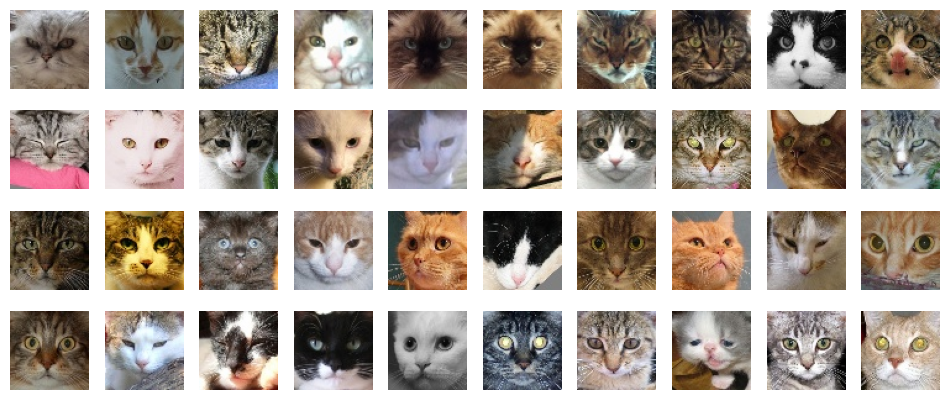

In [6]:

cats_path = "cats"
cats = []

for filename in os.listdir(cats_path):
    cats.append(plt.imread(os.path.join(cats_path, filename)))

cats = np.stack(cats).reshape(-1, 64 * 64 * 3)
print(f"Размерность cats: {cats.shape}")

# Визуализируем примеры
plt.figure(figsize=(12, 5))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(cats[i].reshape(64, 64, 3))
    plt.axis("off")


#### 1. Свойства метрики в пространстве котиков

Прежде всего давайте исследуем, наблюдается ли проблема проклятия размерности в пространстве котиков, фактически повторив исследование предыдущей задачи. Для этого выберите не менее 10000 случайных пар изображений и посчитайте расстояния между ними. Визуализируйте <a href="https://miptstats.github.io/courses/python/09_seaborn.html#3.-Оценки-плотности" target="_blank">KDE-оценку плотности</a> нормированных расстояний.

Повторите те же действия к результату применения PCA, рассмотрев разное количество компонент, например, для 30, 100 и 500. Обратите внимание, что PCA нужно обучать на всех изображениях, а не только для тех, для которых вы будете считать расстояния. Примеры обучения PCA можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">ноутбуке</a> с занятия.

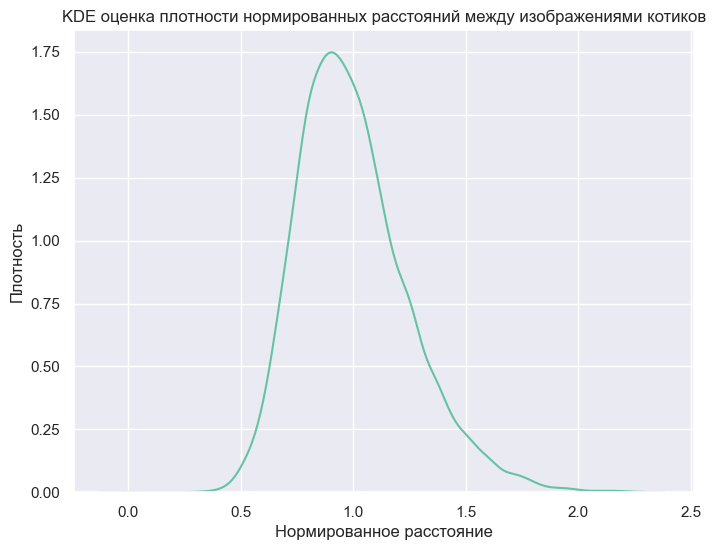

In [7]:
def distance(data):
    return (data ** 2).sum(axis=1)**0.5

def normalize_distances(distances):
    mean_distance = np.mean(distances)
    normalized_distances = distances / mean_distance
    return normalized_distances

sample_indices = np.random.randint(0, len(cats), 20000)
cats_ = np.array(cats).reshape(-1, 64 * 64 * 3)
cats_ = cats_ / 256
diff = cats_[sample_indices[:10000]] - cats_[sample_indices[10000:]]
distances = distance(diff)

normalized_distances = normalize_distances(distances)

plt.figure(figsize=(8, 6))
sns.kdeplot(normalized_distances)
plt.title('KDE оценка плотности нормированных расстояний между изображениями котиков')
plt.xlabel('Нормированное расстояние')
plt.ylabel('Плотность')
plt.show()

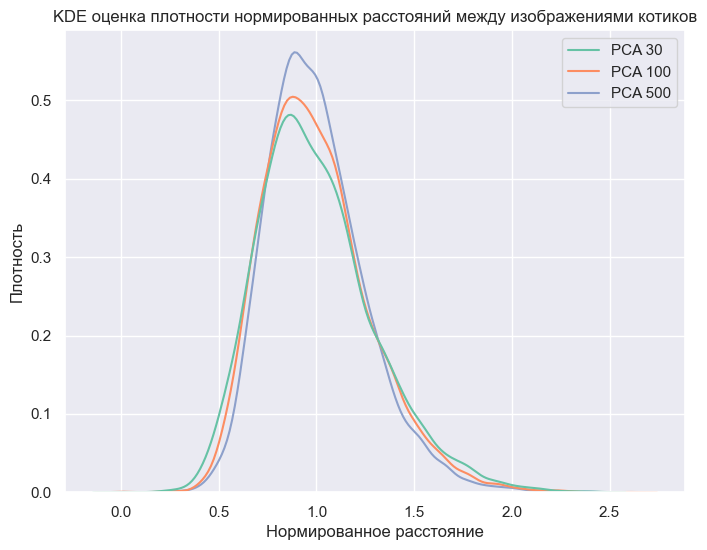

In [8]:
# Обучение PCA на всех изображениях котиков
pca = PCA(n_components=500)  # Мы будем рассматривать 30, 100 и 500 компонент
pca.fit(cats_)

# Применение PCA к данным
cats_pca = pca.transform(cats_)
pca_plots = {}
# Функция для вычисления расстояний после применения PCA
def distance_pca(data):
    return np.linalg.norm(data, axis=1)

# Функция для нормализации расстояний
def normalize_distances_pca(distances):
    mean_distance = np.mean(distances)
    normalized_distances = distances / mean_distance
    return normalized_distances
arr = [30, 100, 500]
for n_components in arr:
    # Обучение PCA
    pca = PCA(n_components=n_components)
    pca.fit(cats_)

    # Применение PCA к данным
    cats_pca = pca.transform(cats_)

    # Вычисление расстояний после применения PCA
    sample_indices = np.random.randint(0, len(cats), 20000)
    diff_pca = cats_pca[sample_indices[:10000]] - cats_pca[sample_indices[10000:]]
    distances_pca = distance_pca(diff_pca)

    # Нормализация расстояний
    normalized_distances_pca = normalize_distances_pca(distances_pca)
    pca_plots[f'PCA {n_components}'] = normalized_distances_pca
    # Визуализация KDE оценки плотности нормированных расстояний после применения PCA
plt.figure(figsize=(8, 6))

sns.kdeplot(pd.DataFrame(pca_plots))
plt.title(f'KDE оценка плотности нормированных расстояний между изображениями котиков')
plt.xlabel('Нормированное расстояние')
plt.ylabel('Плотность')
plt.show()

Сделайте выводы
> PCA уменьшило плотность в несколько раз, что несомненно увеличивает скорость и решает проблему проклятие размерности

#### 2. Кластеризация котиков по вектору изображения

Начнем эксперименты с самого простого способа: каждое изображение можно вытянуть в вектор размерности $64 \cdot 64 \cdot 3$, их и попытаемся кластеризовать. Обучите по этим объектам метод KMeans, пример можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/clustering.html" target="_blank">ноутбуке</a> по кластеризации

In [9]:
%%time

unique_cats = np.unique(cats_, axis=0)
flattened_cats = unique_cats.reshape(unique_cats.shape[0], -1)
for n in range(2, 8):
    # Предсказание
    kmeans = KMeans(n_clusters=n, n_init="auto", random_state=42)
    kmeans.fit(flattened_cats)
    y_pred = kmeans.predict(flattened_cats)

cluster_labels = kmeans.labels_

CPU times: total: 3min 34s
Wall time: 45.1 s


Теперь отобразим изображения на плоскость с помощью PCA и визуализируем полученные предсказания цветом, как это было сделано на семинаре для ответов на вопросы в бот. Ниже уже реализована функция отрисовки `visualize_images_clusterisation`, вам требуется лишь применить PCA и вызвать функцию с правильными параметрами.

In [13]:
def visualize_images_clusterisation(images, projection, clusters, port=None):
    """
    Визуализиует двумерную проекцию эмбеддингов изображений,
    во всплывающем окне показывает сами изображения

    :param images: набор изображений
    :param projection: двумерная проекция изображений или эмбеддингов изображений
    :param clusters: предсказанные кластера
    :param port: опциональный параметр, порт на котором поднимается визуализация:
                 одинаковые порты - одинаковые графики, но если в ноутбуке открыто много портов, то могут начаться лаги
    """
    # Рисуем график с точками как на семинаре
    fig = px.scatter(
        x=projection[:, 0],
        y=projection[:, 1],
        hover_name=clusters,
        hover_data={"image_idx": list(range(len(images)))},
        color=clusters.astype(str),
        width=1000,
        height=800,
        title="PCA проекция изображений на плоскость",
        size=[1] * len(images),
        size_max=12,
    )

    # Добавляем во всплывающее окошко (hover box) изображения
    fig.update_traces(
        hoverinfo="none",
        hovertemplate=None,
    )

    app = Dash(__name__)

    app.layout = html.Div(
        className="container",
        children=[
            dcc.Graph(id="graph-2-dcc", figure=fig, clear_on_unhover=True),
            dcc.Tooltip(id="graph-tooltip-2", direction="bottom"),
        ],
    )

    fig.write_html("pca.html")

    @callback(
        Output("graph-tooltip-2", "show"),
        Output("graph-tooltip-2", "bbox"),
        Output("graph-tooltip-2", "children"),
        Output("graph-tooltip-2", "direction"),
        Input("graph-2-dcc", "hoverData"),
    )
    def display_hover(hoverData):
        """
        Настраивает всплывающее окно hover box.

        :param hoverData: данные соответствующей точки
        """
        if hoverData is None:
            return False, no_update, no_update, no_update

        # Достаем индекс картинки, который выше положили в hover_data
        hover_data = hoverData["points"][0]
        image_idx = hover_data["customdata"][0]
        # И получаем само изображение кота
        image = Image.fromarray(images[image_idx].reshape(64, 64, 3))

        # Преобразовываем изображение в base64 кодировку
        buffer = io.BytesIO()
        image.save(buffer, format="jpeg")
        encoded_image = base64.b64encode(buffer.getvalue()).decode()
        image_url = "data:image/jpeg;base64, " + encoded_image

        image_children = [
            html.Img(
                src=image_url,
                style={"width": "196px"},
            ),
        ]

        return True, hover_data["bbox"], image_children, "top"

    if port is None:
        port = str(np.random.randint(5000, 15000))
    app.run(port=port, debug=True, jupyter_height=800)

    return app

In [14]:
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    pca_projection = pca.fit_transform(data)
    return pca_projection

# Применение PCA к уникальным изображениям
pca_projection = apply_pca(unique_cats, n_components=2)

# Визуализация кластеризации изображений
app = visualize_images_clusterisation(unique_cats, pca_projection, cluster_labels)

Для каждого кластера нарисуйте по 5-10 типичных изображений, то есть ближайших к центру кластера. Похожую операцию мы видели на занятии в <a href="https://miptstats.github.io/courses/ad_fivt/clustering.html" target="_blank">ноутбуке</a> по кластеризации.

*Примечание.* Для одного кластера рисуйте картинки "в строчку". Так будет удобно как вам самим, так и проверяющему. Примеры можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">ноутбуке</a> по PCA.

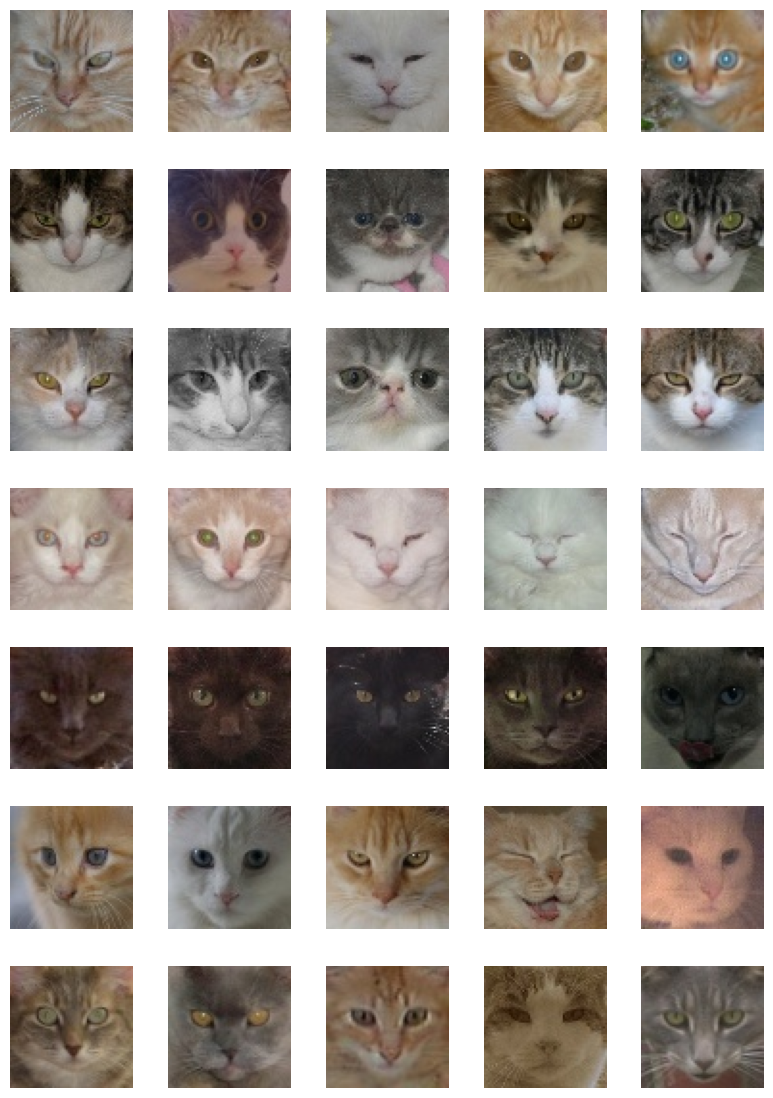

In [15]:
def visualize_cluster_centers(cluster_centers, images, num_images=5):
    num_clusters = len(cluster_centers)
    fig, axes = plt.subplots(num_clusters, num_images, figsize=(num_images*2, num_clusters*2))

    for i in range(num_clusters):
        cluster_center = cluster_centers[i]
        distances = np.linalg.norm(images - cluster_center, axis=1)
        closest_indices = np.argsort(distances)[:num_images]

        for j, idx in enumerate(closest_indices):
            image = images[idx].reshape(64, 64, 3)
            axes[i, j].imshow(image)
            axes[i, j].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    plt.show()

# Визуализация типичных изображений для каждого кластера
visualize_cluster_centers(kmeans.cluster_centers_, unique_cats, num_images=5)


Наблюдаются ли какие-то закономерности в изображениях внутри одного кластера? Если да, то опишите отличительные черты кластеров.

>Кластеры заметно отличаются по цвету. Также можно выделить разные черты лиц котиков и форму глаз например.

Подумайте, чем может быть плох такой подход? Какая проблема могла возникнуть и возникла ли? Обратите внимание на проведенное ранее исследование.

>Два изображения котика могут быть кластеризованы в разные группы из-за разницы в освещении или фоне, не факт, что из-за сходства самих котиков

#### 3. PCA + кластеризация

Попробуем уменьшить размерность перед кластеризацией с помощью PCA, спроектировав изображения на первые несколько главных компонент 

**Примечание.** Не стоит брать больше 100 главных компонент

Сделайте кластеризацию:

In [16]:
%%time
pca = PCA(n_components=40)
pca_projection = pca.fit_transform(unique_cats)
print(pca_projection.shape)

# Кластеризация
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(pca_projection)
print(len(kmeans_pca.cluster_centers_))
cluster_labels_pca = kmeans_pca.labels_


(9303, 40)
5
CPU times: total: 44.2 s
Wall time: 4.26 s


Визуализируйте полученные кластера:

In [17]:
app = visualize_images_clusterisation(unique_cats, pca_projection, cluster_labels_pca)
app

Нарисуйте по 5-10 типичных изображений для новых кластеров

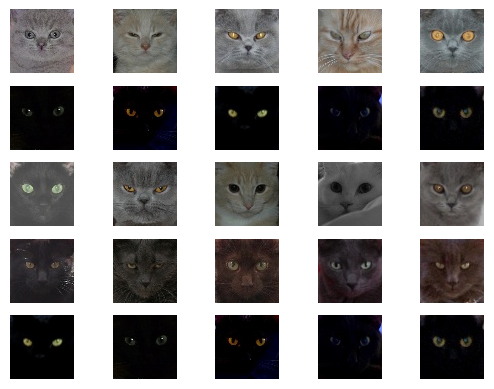

In [24]:
def visualize_cluster_centers(cluster_centers, images, num_images):
    num_clusters = len(cluster_centers)

    for i in range(num_clusters):
        cluster_center = cluster_centers[i]
        cluster_center_reshaped = cluster_center.reshape(-1, 1)

        closest_indices = []
        for image in images:
            distances = np.linalg.norm(image - cluster_center_reshaped)
            closest_indices.append(distances)

        closest_indices = np.argsort(closest_indices)[:num_images]

        for j, idx in enumerate(closest_indices):
            plt.subplot(num_clusters, num_images, i * num_images + j + 1)
            plt.imshow(images[idx].reshape(64, 64, 3))
            plt.axis('off')

    plt.show()

visualize_cluster_centers(kmeans_pca.cluster_centers_, unique_cats, num_images=5)

Опишите отличительные черты кластеров:

Котики уже лучше различимы. Раньше деление было больше по цвету, а сейчас уже видна разница по породам

Сильно ли они отличаются от предыдущего способа?

Да, в предыдущем способе разница внутри кластера была очень большой. Сейчас даже в темноте есть сходство по глазам.


#### 4. Нейросетевые эмбеддинги + кластеризация

Попробуем применить к изображениям такой же подход, как с текстами. То есть возьмем хорошую уже обученную нейросеть, получим с ее помощью эмбеддинги изображений и будем дулеть кластеризацию этих эмбеддингов.

Выберите на <a target="_blank" href="https://huggingface.co/models">huggingface</a> модель для получения эмбеддингов изображений.

**Примечания**
- Нам нужны `CV` модели для задачи извлечения признаков (в фильтрах huggingface называются `Image Feature Extraction`).
- Не выбирайте слишком тяжелые модели (с суффиксами `-huge`, `-giant`, `-large` и прочим), нам это ни к чему, так как картинки маленькие и простые. К тому же это замедлит предсказание эмбеддингов.
- Обычно в карточке модели есть пример применения, который можно скопировать и как в семинаре в цикле применить ко всем батчам изображениям.
- Некоторые модели могут возвращать не эмбеддинг размерности `(D,)`, а матрицу признаков размерности `(n, D)`, в этому случае надо применить average-pooling, усреднив по предпоследней оси.

Загрузите модель, примените к одному тестовому изображению кота и посмотрите на размерность полученного тензора

In [ ]:
from transformers import AutoFeatureExtractor, ViTMSNModel
import torch

example_image = cats[0].reshape(64, 64, 3)

resized_image = example_image.resize((224, 224))

feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/vit-msn-small")
model = ViTMSNModel.from_pretrained("facebook/vit-msn-small")

import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])

example_image_tensor = transform(resized_image)

inputs = feature_extractor(images=example_image_tensor.unsqueeze(0), return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

if last_hidden_states.ndim == 2:
    last_hidden_states = last_hidden_states.mean(dim=-2)


Теперь примените загруженную модель ко всем картинкам

In [ ]:
# <...>

Сделайте кластеризацию полученных эмбеддингов

In [ ]:
# <...>

Визуализируйте полученные кластера:

In [ ]:
# <...>

Нарисуйте по 5-10 типичных изображений для новых кластеров

In [ ]:
# <...>

Опишите отличительные черты кластеров:

<...>

Чем отличаются кластеры, полученные этим способом от первых двух?

<...>

#### 5. Выводы
Сделайте выводы: 

<...>